In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_12156\799151462.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start="1993-01-01")
[*********************100%***********************]  1 of 1 completed

1694 long trades taken
Bull FVG 5 Period Average returns: 0.1%
846 Bullish medium Sized FVGs
Medium Bull FVG 5 Period Average returns: 0.09%
1024 short trades taken
Bear FVG 5 Period Average returns: 0.47%
512 Bearish medium Sized FVGs
Medium Bear FVG 5 Period Average returns: 0.38%


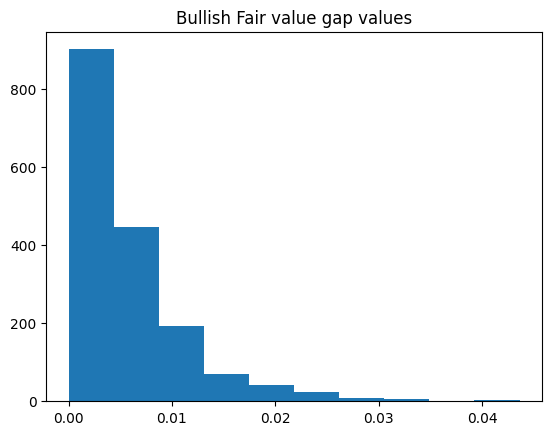

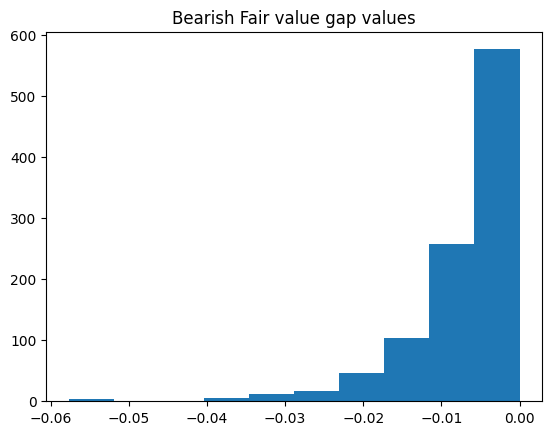

In [11]:
TICKER = 'SPY'
LOOKBACK = 10000
HOLDING_PERIOD = 5

def get_data(TICKER):
    df = yf.download(TICKER, start="1993-01-01") 
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def bull_fvg(df):

    df['High_2prev'] = df['High'].shift(2)
    df['Bull_FVG'] = (df['Low'] > df['High_2prev']).astype(int)
    df['Bull_FVG_Val'] = (df['Low'] - df['High_2prev']) * df['Bull_FVG']/df['Close']

    fvg_subset = df[df['Bull_FVG_Val'] > 0]
    plt.hist(fvg_subset['Bull_FVG_Val'], bins = 10)
    plt.title('Bullish Fair value gap values')

    return df

def bear_fvg(df):

    df['Low_2prev'] = df['Low'].shift(2)
    df['Bear_FVG'] = (df['High'] < df['Low_2prev']).astype(int)
    df['Bear_FVG_Val'] = (df['High'] - df['Low_2prev']) * df['Bear_FVG']/df['Close']

    fvg_subset = df[df['Bear_FVG_Val'] < 0]
    plt.figure()
    plt.hist(fvg_subset['Bear_FVG_Val'], bins = 10)
    plt.title('Bearish Fair value gap values')

    return df

def assess_bull_FVG(df, holding_period = HOLDING_PERIOD):

    #5 day holding period returns
    df[f'Returns_In_{holding_period}_Periods'] = df['Close'].shift(-holding_period) / df['Close']

    fvg_subset = df[df['Bull_FVG_Val'] > 0]
    print(f'{len(fvg_subset)} long trades taken')
    print(f'Bull FVG {holding_period} Period Average returns: {round((fvg_subset[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')

    #define quantiles
    lower = fvg_subset['Bull_FVG_Val'].quantile(.25)
    upper = fvg_subset['Bull_FVG_Val'].quantile(.75)

    fvg_medium_val = fvg_subset[
        (fvg_subset['Bull_FVG_Val'] >= lower) & (fvg_subset['Bull_FVG_Val'] <= upper)
        ]
    print(f'{len(fvg_medium_val)} Bullish medium Sized FVGs')
    print(f'Medium Bull FVG {holding_period} Period Average returns: {round((fvg_medium_val[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')

    return df


def assess_bear_FVG(df, holding_period = HOLDING_PERIOD):

    #5 day holding period returns
    df[f'Returns_{holding_period}P_AGO'] = df['Close'].shift(-holding_period) / df['Close']

    fvg_subset = df[df['Bear_FVG_Val'] < 0]
    print(f'{len(fvg_subset)} short trades taken')
    print(f'Bear FVG {holding_period} Period Average returns: {round((fvg_subset[f'Returns_In_{holding_period}_Periods'].mean()-1) * 100, 2)}%')
    
    #define quantiles
    lower = fvg_subset['Bear_FVG_Val'].quantile(.25)
    upper = fvg_subset['Bear_FVG_Val'].quantile(.75)

    fvg_medium_val = fvg_subset[
        (fvg_subset['Bear_FVG_Val'] >= lower) & (fvg_subset['Bear_FVG_Val'] <= upper)
        ]
    print(f'{len(fvg_medium_val)} Bearish medium Sized FVGs')
    print(f'Medium Bear FVG {holding_period} Period Average returns: {round((fvg_medium_val[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')


    return df

def main():
    df = get_data(TICKER)
    df = bull_fvg(df)
    df = bear_fvg(df)
    df = assess_bull_FVG(df, holding_period = HOLDING_PERIOD)
    df = assess_bear_FVG(df, holding_period = HOLDING_PERIOD)

    return df
df = main()